# Titanic Classification Project

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In [161]:
#Importing all the librarires necessary for the project
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [162]:
#Importing the data sets
train_df = pd.read_csv('/Users/bartosz/Data Projects/Titanic - Classification/titanc_train.csv')
test_df = pd.read_csv('/Users/bartosz/Data Projects/Titanic - Classification/titanic_test.csv')

# Quick Data Exploration


In [163]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [169]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [170]:
print("\n", train_df.groupby(['Pclass'], as_index=False)['Survived'].agg(['mean', 'count']))
print("\n", train_df.groupby(['Sex'], as_index=False)['Survived'].agg(['mean', 'count']))
print("\n", train_df.groupby(['SibSp'], as_index=False)['Survived'].agg(['mean', 'count']))
print("\n", train_df.groupby(['Parch'], as_index=False)['Survived'].agg(['mean', 'count']))
print("\n", train_df.groupby(['Embarked'], as_index=False)['Survived'].agg(['mean', 'count']))


    Pclass      mean  count
0       1  0.629630    216
1       2  0.472826    184
2       3  0.242363    491

       Sex      mean  count
0  female  0.742038    314
1    male  0.188908    577

    SibSp      mean  count
0      0  0.345395    608
1      1  0.535885    209
2      2  0.464286     28
3      3  0.250000     16
4      4  0.166667     18
5      5  0.000000      5
6      8  0.000000      7

    Parch      mean  count
0      0  0.343658    678
1      1  0.550847    118
2      2  0.500000     80
3      3  0.600000      5
4      4  0.000000      4
5      5  0.200000      5
6      6  0.000000      1

   Embarked      mean  count
0        C  0.553571    168
1        Q  0.389610     77
2        S  0.336957    644


# Project Planning

1. Add features to the data
 - age groups,
 - family size,
 - group fares,
 - title extracted from the name
 - group titles (military, royalty, etc.)
 - ticket number?

# Missing data

Dealing with missing data

In [171]:
print('\nNull Values in Training \n{}'.format(train_df.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_df.isnull().sum()))

print('\nDuplicated values in train {}'.format(train_df.duplicated().sum()))
print('Duplicated values in test {}'.format(test_df.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


## Embarked

Data was filled using the most popular embarkement destination

In [172]:
#How many passangers embarked from each port?
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [173]:
#Filling in the data for missing Embarked values with S since S is the most common.
#There are no missing values in Embarked in test dataset, therefore only doing the operation on the train dataset.
train_df['Embarked'].fillna('S', inplace=True)

In [174]:
#891 false results, meaning the values have been filled
print('Missing embarked values {}'.format(train_df['Embarked'].isna().sum()))

Missing embarked values 0


## Age

There are 177 age values are missing (19.87%) in the training set and 86 (20.57%) are missing in the training set. they should be filled, so that the information is not lost. There are a couple of assumption which can be made, about the that which will help to fill the missing values. Age will be filled using the mean age grouped by title (Mr, Mrs & Miss). If neither of those titles is the persons title, mean age of the whole dataset will be used.


### Missing age values in the train_df:

In [175]:
print('Missing age (Mr)\n{}'.format(train_df[train_df['Name'].str.contains('Mr', na=False)]['Age'].isna().sum()))
print('\nMissing age (Mrs)\n{}'.format(train_df[train_df['Name'].str.contains('Mrs', na=False)]['Age'].isna().sum()))
print('\nMissing age (Miss)\n{}'.format(train_df[train_df['Name'].str.contains('Miss', na=False)]['Age'].isna().sum()))

print('\nMissing age (Mr, Mrs & Miss)\n{}'.format(train_df[train_df['Name'].str.contains('Mr|Mrs|Miss', na=False)]['Age'].isna().sum()))

Missing age (Mr)
136

Missing age (Mrs)
17

Missing age (Miss)
36

Missing age (Mr, Mrs & Miss)
172


172 out of 177 missing name values are associated with the title Mr, Mrs and Miss. We can therefore, use the mean of the age of a certain title to fill in the missing values.

### Missing age vales in the test_df:

In [176]:
print('Missing age (Mr)\n{}'.format(test_df[test_df['Name'].str.contains('Mr', na=False)]['Age'].isna().sum()))
print('\nMissing age (Mrs)\n{}'.format(test_df[test_df['Name'].str.contains('Mrs', na=False)]['Age'].isna().sum()))
print('\nMissing age (Miss)\n{}'.format(test_df[test_df['Name'].str.contains('Miss', na=False)]['Age'].isna().sum()))

print('\nMissing age (Mr, Mrs & Miss)\n{}'.format(test_df[test_df['Name'].str.contains('Mr|Mrs|Miss', na=False)]['Age'].isna().sum()))

Missing age (Mr)
67

Missing age (Mrs)
10

Missing age (Miss)
14

Missing age (Mr, Mrs & Miss)
81


81 out of 86 values are associated with titles Mr, Mrs and Miss. We will use mean ages of those titles to fill missing data.

In [177]:
#Mean of the age, before filling in the missing data
print('Mean of the age in the train_df {}'.format(train_df['Age'].mean().round(2)))
print('\nMean of the age in the test_df {}'.format(test_df['Age'].mean().round(2)))

Mean of the age in the train_df 29.7

Mean of the age in the test_df 30.27


In [178]:
#Creating a function that fills in the age in both datasets independently
def fill_age(df):
    mean_age_mr = df[df['Name'].str.contains('Mr', na=False)]['Age'].mean()
    mean_age_mrs = df[df['Name'].str.contains('Mrs', na=False)]['Age'].mean()
    mean_age_miss = df[df['Name'].str.contains('Miss', na=False)]['Age'].mean()

    for index, row in df.iterrows():
        if pd.isna(row['Age']):
            if 'Mr' in row['Name']:
                df.at[index, 'Age'] = mean_age_mr
            elif 'Mrs' in row['Name']:
                df.at[index, 'Age'] = mean_age_mrs
            elif 'Miss' in row['Name']:
                df.at[index, 'Age'] = mean_age_miss
            else:
                df.at[index, 'Age'] = df['Age'].mean()

In [179]:
#Filling in the age in both data sets
fill_age(train_df)
fill_age(test_df)

In [180]:
#Mean of the age, after filling in the missing data, has changed only slighlty
print('Mean age in train_df {}'.format(train_df['Age'].mean().round(2)))
print('\nMean age in test_df {}'.format(test_df['Age'].mean().round(2)))

Mean age in train_df 29.9

Mean age in test_df 30.55


Only a slight increase in the mean age of the entire set.

### Conclusion

In [181]:
#All values have been filled
print('Missing age in train_df {}'.format(train_df['Age'].isna().sum()))
print('\nMissing age in test_df {}'.format(test_df['Age'].isna().sum()))

Missing age in train_df 0

Missing age in test_df 0


All missing age values in both DataFrames have been filled.

## Cabin

Last major category is cabin which has 687 (77.1%) and 327 (78.22%) missing values in train_df and test_df respectively. Instead of deleting the entire column, the missing data will be replaced with 'X' and the rest of the cabin data will be shortened to only the first letter.

In [182]:
#Stripping everything but the first letter of the cabin, and filling in the missing values with 'X'
train_df['Cabin'].fillna('X', inplace=True)
train_df['Cabin'] = pd.Series(i[0] if not pd.isna(i) else 'X' for i in train_df['Cabin'])

test_df['Cabin'].fillna('X', inplace=True)
test_df['Cabin'] = pd.Series(i[0] if not pd.isna(i) else 'X' for i in test_df['Cabin'])

In [183]:
#All values have been filled
print('Missing cabin in train_df {}'.format(train_df['Cabin'].isna().sum()))
print('\nMissing cabin in test_df {}'.format(test_df['Cabin'].isna().sum()))

Missing cabin in train_df 0

Missing cabin in test_df 0


In [184]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['mean', 'count'])

,Cabin,mean,count
0,A,0.466667,15
1,B,0.744681,47
2,C,0.593220,59
3,D,0.757576,33
4,E,0.750000,32
5,F,0.615385,13
6,G,0.500000,4
7,T,0.000000,1
8,X,0.299854,687


/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cabin', ylabel='Fare'>

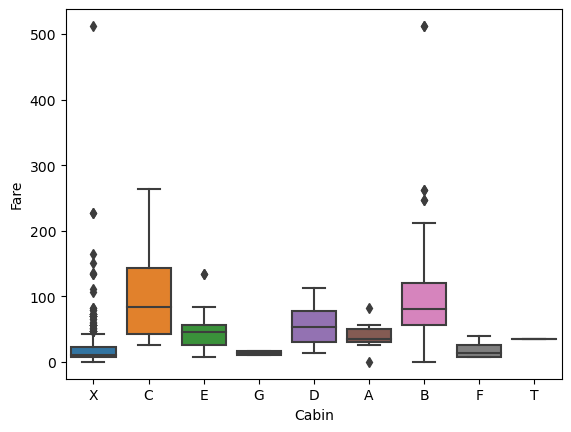

In [185]:
sns.boxplot(x='Cabin',y='Fare',data=train_df)

In [186]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [187]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,X,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,X,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,X,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,X,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,X,S


## Fare

Only one value is missing therefore it will be filled using median

In [188]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True) 

In [189]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Conclusion

In [190]:
print('\nNull Values in Training \n{}'.format(train_df.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_df.isnull().sum()))

print('\nDuplicated values in train {}'.format(train_df.duplicated().sum()))
print('Duplicated values in test {}'.format(test_df.duplicated().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Null Values in Testing 
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


# Adding features

## Age

Splitting the age into equally sized groups

/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

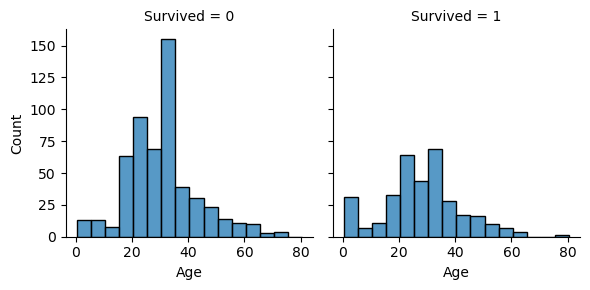

In [191]:
sns.displot(train_df, x='Age', col='Survived', binwidth=5, height=3)

In [192]:
#Creating a Age Group feature using pandas qcut into 8 bins
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [193]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].agg(['mean', 'count'])

/var/folders/38/832j8mz95kqfxxr3cw5w_xgc0000gn/T/ipykernel_18489/3217634119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].agg(['mean', 'count'])


,Age_Cut,mean,count
0,"(0.419, 17.0]",0.539823,113
1,"(17.0, 21.774]",0.377953,127
2,"(21.774, 25.0]",0.381443,97
3,"(25.0, 30.0]",0.389381,113
4,"(30.0, 33.118]",0.273684,190
5,"(33.118, 35.0]",0.500000,34
6,"(35.0, 45.0]",0.394737,114
7,"(45.0, 80.0]",0.368932,103


In [194]:
train_df.loc[train_df['Age'] <= 17, 'Age_Group'] = 0
train_df.loc[(train_df['Age'] > 17) & (train_df['Age'] <= 21.774), 'Age_Group'] = 1
train_df.loc[(train_df['Age'] > 21.774) & (train_df['Age'] <= 25), 'Age_Group'] = 2
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 30), 'Age_Group'] = 3
train_df.loc[(train_df['Age'] > 30) & (train_df['Age'] <= 33.118), 'Age_Group'] = 4
train_df.loc[(train_df['Age'] > 33.118) & (train_df['Age'] <= 35), 'Age_Group'] = 5
train_df.loc[(train_df['Age'] > 35) & (train_df['Age'] <= 45), 'Age_Group'] = 6
train_df.loc[(train_df['Age'] > 45), 'Age_Group'] = 7

test_df.loc[test_df['Age'] <= 17, 'Age_Group'] = 0
test_df.loc[(test_df['Age'] > 17) & (test_df['Age'] <= 21.774), 'Age_Group'] = 1
test_df.loc[(test_df['Age'] > 21.774) & (test_df['Age'] <= 25), 'Age_Group'] = 2
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 30), 'Age_Group'] = 3
test_df.loc[(test_df['Age'] > 30) & (test_df['Age'] <= 33.118), 'Age_Group'] = 4
test_df.loc[(test_df['Age'] > 33.118) & (test_df['Age'] <= 35), 'Age_Group'] = 5
test_df.loc[(test_df['Age'] > 35) & (test_df['Age'] <= 45), 'Age_Group'] = 6
test_df.loc[(test_df['Age'] > 45), 'Age_Group'] = 7

In [195]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,"(21.774, 25.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(35.0, 45.0]",6.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,"(25.0, 30.0]",3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(33.118, 35.0]",5.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,"(33.118, 35.0]",5.0


In [196]:
train_df[train_df['Age_Group'].isna()].iloc[:, :-10]

,PassengerId,Survived,Pclass,Name


## Family size

In [197]:
#Creating a Family Size feature by adding number of parents/children (Parch) and number of siblings/spouses (SibSp) plus 1 for the person
train_df['Family_Size'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['Family_Size'] = test_df['Parch'] + test_df['SibSp'] + 1

In [198]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].agg(['mean', 'count'])

,Family_Size,mean,count
0,1,0.303538,537
1,2,0.552795,161
2,3,0.578431,102
3,4,0.724138,29
4,5,0.200000,15
5,6,0.136364,22
6,7,0.333333,12
7,8,0.000000,6
8,11,0.000000,7


In [199]:
#Mapping the size of the family to the category alone, small, medium or large
family_size_group = {1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'Medium', 8:'Large', 11:'Large'}
train_df['Family_Size_Group'] = train_df['Family_Size'].map(family_size_group)
test_df['Family_Size_Group'] = test_df['Family_Size'].map(family_size_group)

In [200]:
train_df.groupby(['Family_Size_Group'], as_index=False)['Survived'].agg(['mean', 'count'])

,Family_Size_Group,mean,count
0,Alone,0.303538,537
1,Large,0.000000,13
2,Medium,0.204082,49
3,Small,0.578767,292


In [201]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,Age_Group,Family_Size,Family_Size_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,"(21.774, 25.0]",2.0,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(35.0, 45.0]",6.0,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,"(25.0, 30.0]",3.0,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(33.118, 35.0]",5.0,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,"(33.118, 35.0]",5.0,1,Alone


In [202]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,Age_Group,Family_Size,Family_Size_Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,X,Q,"(33.747, 35.75]",5.0,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,X,S,"(45.0, 76.0]",7.0,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,X,Q,"(45.0, 76.0]",7.0,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,X,S,"(26.0, 30.0]",3.0,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,X,S,"(18.0, 22.0]",2.0,3,Small


## Fares

In [203]:
train_df.groupby(['Fare'], as_index=False)['Survived'].agg(['mean', 'count'])

,Fare,mean,count
0,0.0000,0.066667,15
1,4.0125,0.000000,1
2,5.0000,0.000000,1
3,6.2375,0.000000,1
4,6.4375,0.000000,1
...,...,...,...
243,227.5250,0.750000,4
244,247.5208,0.500000,2
245,262.3750,1.000000,2
246,263.0000,0.500000,4


/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

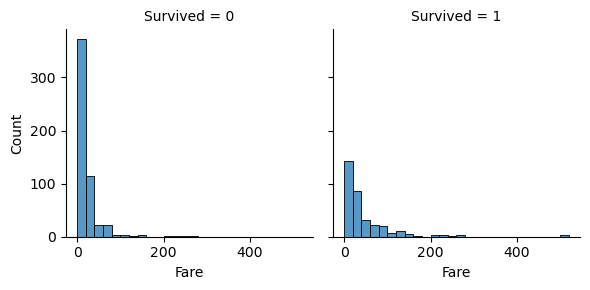

In [204]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=20, height=3)

In [205]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 8)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 8)

In [206]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].agg(['mean', 'count'])

/var/folders/38/832j8mz95kqfxxr3cw5w_xgc0000gn/T/ipykernel_18489/2047317529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].agg(['mean', 'count'])


,Fare_Cut,mean,count
0,"(-0.001, 7.75]",0.207143,140
1,"(7.75, 7.91]",0.180723,83
2,"(7.91, 9.841]",0.198198,111
3,"(9.841, 14.454]",0.407080,113
4,"(14.454, 24.479]",0.436364,110
5,"(24.479, 31.0]",0.473214,112
6,"(31.0, 69.488]",0.481818,110
7,"(69.488, 512.329]",0.678571,112


In [207]:
train_df.loc[train_df['Fare'] <= 7.75, 'Fare_Group'] = 0
train_df.loc[(train_df['Fare'] > 7.75) & (train_df['Fare'] <= 7.91), 'Fare_Group'] = 1
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 9.841), 'Fare_Group'] = 2
train_df.loc[(train_df['Fare'] > 9.841) & (train_df['Fare'] <= 14.454), 'Fare_Group'] = 3
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 24.479), 'Fare_Group'] = 4
train_df.loc[(train_df['Fare'] > 24.479) & (train_df['Fare'] <= 31), 'Fare_Group'] = 5
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 69.488), 'Fare_Group'] = 6
train_df.loc[train_df['Fare'] > 69.488, 'Fare_Group'] = 7

test_df.loc[test_df['Fare'] <= 7.75, 'Fare_Group'] = 0
test_df.loc[(test_df['Fare'] > 7.75) & (test_df['Fare'] <= 7.91), 'Fare_Group'] = 1
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 9.841), 'Fare_Group'] = 2
test_df.loc[(test_df['Fare'] > 9.841) & (test_df['Fare'] <= 14.454), 'Fare_Group'] = 3
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 24.479), 'Fare_Group'] = 4
test_df.loc[(test_df['Fare'] > 24.479) & (test_df['Fare'] <= 31), 'Fare_Group'] = 5
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare'] <= 69.488), 'Fare_Group'] = 6
test_df.loc[test_df['Fare'] > 69.488, 'Fare_Group'] = 7

In [208]:
test_df[test_df['Fare_Cut'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,Age_Group,Family_Size,Family_Size_Group,Fare_Cut,Fare_Group


In [209]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,Age_Group,Family_Size,Family_Size_Group,Fare_Cut,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,"(21.774, 25.0]",2.0,2,Small,"(-0.001, 7.75]",0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(35.0, 45.0]",6.0,2,Small,"(69.488, 512.329]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,"(25.0, 30.0]",3.0,1,Alone,"(7.91, 9.841]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(33.118, 35.0]",5.0,2,Small,"(31.0, 69.488]",6.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,"(33.118, 35.0]",5.0,1,Alone,"(7.91, 9.841]",2.0


In [210]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,Age_Group,Family_Size,Family_Size_Group,Fare_Cut,Fare_Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,X,Q,"(33.747, 35.75]",5.0,1,Alone,"(7.75, 7.896]",1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,X,S,"(45.0, 76.0]",7.0,2,Small,"(-0.001, 7.75]",0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,X,Q,"(45.0, 76.0]",7.0,1,Alone,"(7.896, 10.5]",2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,X,S,"(26.0, 30.0]",3.0,1,Alone,"(7.896, 10.5]",2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,X,S,"(18.0, 22.0]",2.0,3,Small,"(10.5, 14.454]",3.0


## Title

Extracing a title from a name. Grouping the titles based on the social groups the people belong to (e.g. military, noble, etc.)

In [211]:
#Extracing the title from person's name
train_df['Title'] = train_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].apply(lambda x: x.strip())

train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [212]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['mean', 'count']).sort_values(by=['count'], ascending=False)

,Title,mean,count
11,Mr,0.156673,517
8,Miss,0.697802,182
12,Mrs,0.792000,125
7,Master,0.575000,40
3,Dr,0.428571,7
14,Rev,0.000000,6
6,Major,0.500000,2
1,Col,0.500000,2
9,Mlle,1.000000,2
15,Sir,1.000000,1


## Ticket

In [213]:
train_df.groupby(['Ticket'], as_index=False)['Survived'].agg(['mean', 'count'])

,Ticket,mean,count
0,110152,1.000000,3
1,110413,0.666667,3
2,110465,0.000000,2
3,110564,1.000000,1
4,110813,1.000000,1
...,...,...,...
676,W./C. 6608,0.000000,4
677,W./C. 6609,0.000000,1
678,W.E.P. 5734,0.000000,1
679,W/C 14208,0.000000,1


In [214]:
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [215]:
train_df['Ticket_Prefix'] = np.where(train_df['Ticket'].str.split(" ", expand=True)[1].notna(), train_df['Ticket'].str.split(" ", expand=True)[0].apply(lambda x: x.strip()), "None")
test_df['Ticket_Prefix'] = np.where(test_df['Ticket'].str.split(" ", expand=True)[1].notna(), test_df['Ticket'].str.split(" ", expand=True)[0].apply(lambda x: x.strip()), "None")

In [216]:
train_df['Ticket_Prefix'].value_counts()

Ticket_Prefix
None          665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [217]:
ticket_prefix_rename = {
    'CA.':'C.A.',
    'CA':'C.A.',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'A/5.':'A/5',
    'A/4.':'A/4',
    'A4.':'A/4',
    'W./C.':'W/C',
    'SOTON/OQ':'SOTON/O.Q.',
    'SC/PARIS':'S.C./Paris',
}

train_df['Ticket_Prefix'].replace(ticket_prefix_rename, inplace=True)
test_df['Ticket_Prefix'].replace(ticket_prefix_rename, inplace=True)

In [218]:
train_df.groupby(['Ticket_Prefix'], as_index=False)['Survived'].agg(['mean', 'count'])

,Ticket_Prefix,mean,count
0,A/4,0.000000,7
1,A/5,0.095238,21
2,A/S,0.000000,1
3,C,0.400000,5
4,C.A.,0.341463,41
5,C.A./SOTON,0.000000,1
6,F.C.,0.000000,1
7,F.C.C.,0.800000,5
8,Fa,0.000000,1
9,None,0.383459,665


## Cabin

In [219]:
train_df['Cabin'].value_counts()

Cabin
X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [220]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['X'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['X'] else 1)

## Name Length

In [221]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

In [222]:
train_df['Name_Length_Cut'] = pd.qcut(train_df['Name_Length'], 4)
test_df['Name_Length_Cut'] = pd.qcut(test_df['Name_Length'], 4)

In [223]:
train_df.groupby(['Name_Length_Cut'], as_index=False)['Survived'].agg(['mean', 'count'])

/var/folders/38/832j8mz95kqfxxr3cw5w_xgc0000gn/T/ipykernel_18489/2364321627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_Length_Cut'], as_index=False)['Survived'].agg(['mean', 'count'])


,Name_Length_Cut,mean,count
0,"(11.999, 20.0]",0.230453,243
1,"(20.0, 25.0]",0.325581,215
2,"(25.0, 30.0]",0.364929,211
3,"(30.0, 82.0]",0.626126,222


In [224]:
train_df.loc[train_df['Name_Length'] <= 20, 'Name_Length_Group'] = 0
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 25), 'Name_Length_Group'] = 1
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 30), 'Name_Length_Group'] = 2
train_df.loc[train_df['Name_Length'] > 30, 'Name_Length_Group'] = 3

test_df.loc[test_df['Name_Length'] <= 20, 'Name_Length_Group'] = 0
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 25), 'Name_Length_Group'] = 1
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 30), 'Name_Length_Group'] = 2
test_df.loc[test_df['Name_Length'] > 30, 'Name_Length_Group'] = 3

/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

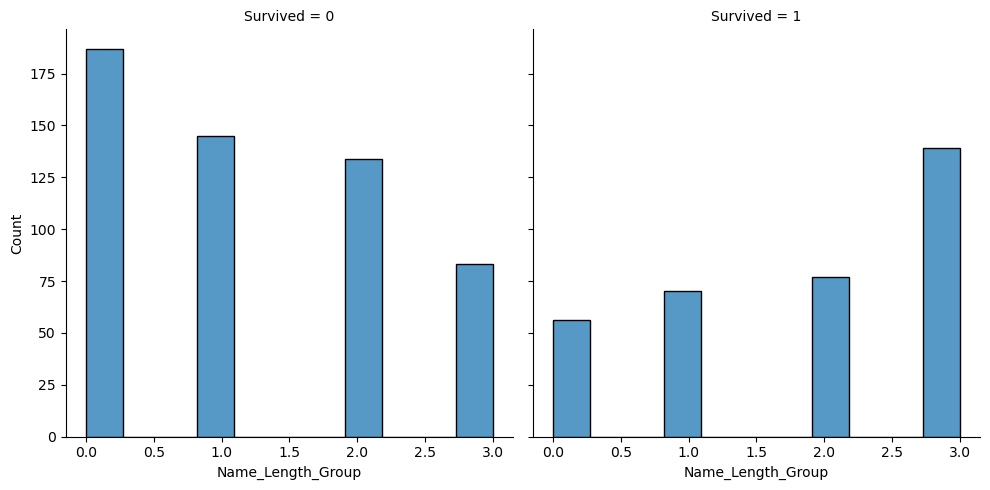

In [225]:
sns.displot(train_df, x='Name_Length_Group', col='Survived')

## Data Types

In [226]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                891 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Cabin              891 non-null    object  
 11  Embarked           891 non-null    object  
 12  Age_Cut            891 non-null    category
 13  Age_Group          891 non-null    float64 
 14  Family_Size        891 non-null    int64   
 15  Family_Size_Group  891 non-null    object  
 16  Fare_Cut

In [227]:
train_df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                0
Embarked             0
Age_Cut              0
Age_Group            0
Family_Size          0
Family_Size_Group    0
Fare_Cut             0
Fare_Group           0
Title                0
Ticket_Prefix        0
Cabin_Assigned       0
Name_Length          0
Name_Length_Cut      0
Name_Length_Group    0
dtype: int64

In [228]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        418 non-null    int64   
 1   Pclass             418 non-null    int64   
 2   Name               418 non-null    object  
 3   Sex                418 non-null    object  
 4   Age                418 non-null    float64 
 5   SibSp              418 non-null    int64   
 6   Parch              418 non-null    int64   
 7   Ticket             418 non-null    object  
 8   Fare               418 non-null    float64 
 9   Cabin              418 non-null    object  
 10  Embarked           418 non-null    object  
 11  Age_Cut            418 non-null    category
 12  Age_Group          418 non-null    float64 
 13  Family_Size        418 non-null    int64   
 14  Family_Size_Group  418 non-null    object  
 15  Fare_Cut           418 non-null    category
 16  Fare_Gro

In [229]:
test_df.isna().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                0
Embarked             0
Age_Cut              0
Age_Group            0
Family_Size          0
Family_Size_Group    0
Fare_Cut             0
Fare_Group           0
Title                0
Ticket_Prefix        0
Cabin_Assigned       0
Name_Length          0
Name_Length_Cut      0
Name_Length_Group    0
dtype: int64

In [230]:
train_df.shape

(891, 24)

In [231]:
test_df.shape

(418, 23)

<Axes: >

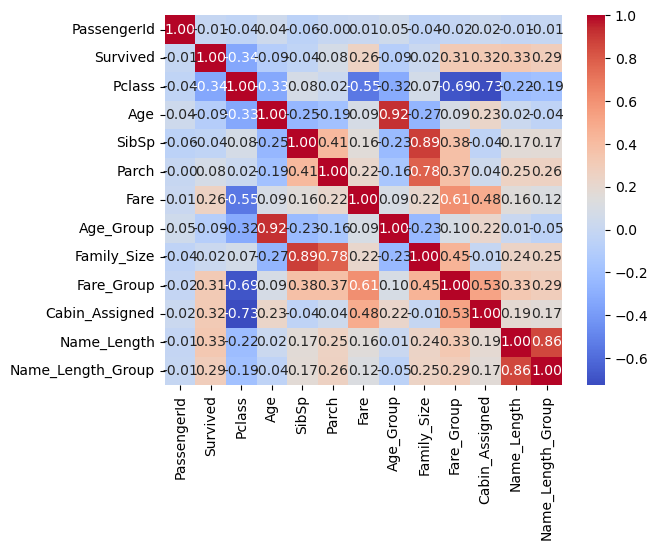

In [232]:
correlation_matrix = train_df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Machine Learning

In [233]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [234]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size,Family_Size_Group,Fare_Cut,Fare_Group,Title,Ticket_Prefix,Cabin_Assigned,Name_Length,Name_Length_Cut,Name_Length_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,Small,"(-0.001, 7.75]",0.0,Mr,A/5,0,23,"(20.0, 25.0]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,Small,"(69.488, 512.329]",7.0,Mrs,PC,1,51,"(30.0, 82.0]",3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Alone,"(7.91, 9.841]",2.0,Miss,STON/O2.,0,22,"(20.0, 25.0]",1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,Small,"(31.0, 69.488]",6.0,Mrs,None,1,44,"(30.0, 82.0]",3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,Alone,"(7.91, 9.841]",2.0,Mr,None,0,24,"(20.0, 25.0]",1.0


In [235]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Cut', 'Age_Group',
       'Family_Size', 'Family_Size_Group', 'Fare_Cut', 'Fare_Group', 'Title',
       'Ticket_Prefix', 'Cabin_Assigned', 'Name_Length', 'Name_Length_Cut',
       'Name_Length_Group'],
      dtype='object')

In [236]:
ode_cols = ['Family_Size_Group']
ohe_cols = ['Sex', 'Embarked', 'Cabin', 'Ticket_Prefix']

In [237]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [239]:
ordnial_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [240]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [241]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordnial_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Length', 'Age', 'Fare'])
],
remainder='drop',
n_jobs = -1
)

In [242]:
rfc = RandomForestClassifier()

In [243]:
param_grid = {
    'n_estimators':[100, 150, 200],
    'min_samples_split':[5, 10, 15],
    'max_depth':[8, 9, 10, 15, 20],
    'min_samples_leaf':[1, 2, 4],
    'criterion':['gini', 'entropy'],
}

In [244]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [245]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Length', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [246]:
print(CV_rfc.best_params_)
print('\n', CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

 0.8396129032258065


In [247]:
dtc = DecisionTreeClassifier()

In [248]:
param_grid = {
    'min_samples_split':[5, 10, 15],
    'max_depth':[10, 20, 30],
    'min_samples_leaf':[1, 2, 4],
    'criterion':['gini', 'entropy'],
}

In [249]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [250]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                   'Ticket_Prefix']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Length', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [251]:
print(CV_dtc.best_params_)
print('\n', CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

 0.8186580645161289


In [252]:
knn = KNeighborsClassifier()

In [253]:
param_grid = {
    'n_neighbors':[3, 5, 7, 9, 11, 15],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1, 2]
}

In [254]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [255]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Length', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11, 15],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [256]:
print(CV_knn.best_params_)
print('\n', CV_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

 0.7496774193548388


In [257]:
svc = SVC()

In [258]:
param_grid = {
    'C':[100, 10, 1, 0.1, 0.01, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [259]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [260]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(CV_svc.best_params_)
print('\n', CV_svc.best_score_)

{'C': 100, 'kernel': 'rbf'}

 0.7897419354838711


In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {
    'C':[1000, 100, 10, 1, 0.1, 0.001, 0.0001]
}

In [ ]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=10))

In [ ]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

/Users/bartosz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bartosz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Ticket_Prefix']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Length', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [1000, 100, 10, 1, 0.1, 0.001,
                                                0.0001]}))])

In [ ]:
print(CV_lr.best_params_)
print('\n', CV_lr.best_score_)

{'C': 0.1}

 0.799411162314388


In [ ]:
gnb = GaussianNB()

In [ ]:
param_grid = {
    'var_smoothing':[0.0000001, 0.00000001, 0.000000001, 0.00000000001]
}

In [ ]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=15))

In [ ]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Ticket_Prefix']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Length', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09,
                                                            1e-11]}))])

In [ ]:
print(CV_gnb.best_params_)
print('\n', CV_gnb.best_score_)

{'var_smoothing': 1e-07}

 0.44459930313588863


In [ ]:
Y_pred = pipefinalrfc.predict(test_df)
Y_pred2 = pipefinaldtc.predict(test_df)
Y_pred3 = pipefinalknn.predict(test_df)
Y_pred4 = pipefinalsvc.predict(test_df)
Y_pred5 = pipefinallr.predict(test_df)
Y_pred6 = pipefinalgnb.predict(test_df)

In [ ]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred6
})

In [ ]:
submission3.to_csv('/Users/bartosz/submission titanic3 21.04.2024.csv', index=False)